In [5]:
import pandas as pd
import numpy as np

In [6]:
food_data= pd.read_csv("/content/drive/MyDrive/Classified RawData - RawData.csv")
food_data.describe()

,Class
count,10000.000000
mean,3.130500
std,1.435993
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,5.000000


In [7]:
food_data.drop(['asins', 'dateAdded','dateUpdated','ean','manufacturerNumber','sizes','upc'], axis=1, inplace=True)

In [8]:
color=[]
keys=["color","colour","yellow","blue","green","red"]
for item in food_data["features.value"]:
  if item and type(item)==str:
    color.append(any([(key in item.lower()) for key in keys ]))
  else:
    color.append(False)




In [9]:
print(len(color),len(food_data["features.value"]))
print(sum(color))

10000 10000
4865


In [10]:
food_data["Artificial_colour"]=color
food_data.head()

,id,brand,categories,features.key,features.value,manufacturer,name,weight,Class,Artificial_colour
0,AVphBRHOilAPnD_x0OrE,Simon Fischer,"Grocery & Gourmet Food,Food,Grocery",Ingredients,"Dried Prunes,Water,Corn Syrup,Sugar,Pectin.",Sokol And Company,Simon Fischer Fruit Bttr Prune Lekvar,10.6 pounds,4,False
1,AVpfNFy1LJeJML434ma2,McCormick,"Grocery & Gourmet Food,Food,Grocery",Ingredients,"Salt,Sugar,Molasses (Refinery Syrup, Molasses,...","McCormick & Co, Inc",McCORMICK GRILL MATES MOLASSES BACON SEASONING...,3.5 ounces,1,True
2,AVpgT49VLJeJML43MJEz,Jolly Time,"Grocery & Gourmet Food,Grocery",Ingredients,"Salt, Yellow 5 Lake, Tricalcium Phosphate And ...",Reese's,Jolly Time Popcorn,1.8 pounds,2,True
3,AVphYgnzLJeJML43aPp2,Ziyad,"Grocery & Gourmet Food,grocery",Ingredients,Mechanically hulled seasame seeds.Allergy Info...,Ziyad,Ziyad Tahini Sesame Sauce,1.6 pounds,5,False
4,AVpiS0bOLJeJML43kRsh,Fla-Vor-Ice,"Grocery & Gourmet Food,grocery",Ingredients,FALSE,Fla-Vor-Ice,Fla-Vor-Ice Plus Giant Pops,18 pounds,5,False


In [11]:
n_n=[]
n_nkeys=["nitrite","nitrate"]
for item in food_data["features.value"]:
  if item and type(item)==str:
    n_n.append(any([(key in item.lower()) for key in n_nkeys ]))
  else:
    n_n.append(False)

In [12]:
print(sum(n_n))

1428


In [13]:
food_data["Nitrites_Nitrates"]=n_n

In [14]:
sweet=[]
sweetkeys=['aspartame',
    'sucralose',
    'acesulfame K','acesulfame'
    'saccharin',
    'xylitol','sweetener','neotame']

for item in food_data["features.value"]:
  if item and type(item)==str:
    sweet.append(any([(key in item.lower()) for key in sweetkeys]))
  else:
    sweet.append(False)



In [15]:
print(sum(sweet))

598


In [16]:
food_data["Artificial_Sweetener"]=sweet

In [17]:
t_fat=[]
fat_keys=["hydrogenated","hydrogenated oil","hydrogenated soy","trans fat"]

for item in food_data["features.value"]:
  if item and type(item)==str:
    t_fat.append(any([(key in item.lower()) for key in fat_keys]))
  else:
    t_fat.append(False)

In [18]:
print(sum(t_fat))

954


In [19]:
food_data["Trans_Fat"]=t_fat

In [20]:
HF=[]
HFkeys=['high fructose corn syrup','corn syrup','hf']

for item in food_data["features.value"]:
  if item and type(item)==str:
    HF.append(any([(key in item.lower()) for key in HFkeys]))
  else:
    HF.append(False)

In [21]:
print(sum(HF))

1829


In [22]:
food_data["HighFructoseCornSyrup"]=HF

In [23]:
f_f=[]
f_fkeys=['fragrance','flavor','flavour','scent']

for item in food_data["features.value"]:
  if item and type(item)==str:
    f_f.append(any([(key in item.lower()) for key in f_fkeys]))
  else:
    f_f.append(False)



In [24]:
print(sum(f_f))

4762


In [25]:
food_data["Fragrance_Flavor"]=f_f

In [26]:
x_data=food_data[['Artificial_colour','Nitrites_Nitrates','HighFructoseCornSyrup','Trans_Fat','Fragrance_Flavor','Artificial_Sweetener']]
y_data=food_data['Class']

In [27]:
x_data.head()


,Artificial_colour,Nitrites_Nitrates,HighFructoseCornSyrup,Trans_Fat,Fragrance_Flavor,Artificial_Sweetener
0,False,False,True,False,False,False
1,True,True,False,False,True,False
2,True,False,False,False,True,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.25, shuffle=False)

In [30]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


pipeline=[LogisticRegression(solver="newton-cg"),GaussianNB(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),DecisionTreeClassifier()]
accuracy=[]
confusionmatrix=[]
for model in pipeline:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy.append(metrics.accuracy_score(y_test,y_pred))
  confusionmatrix.append(confusion_matrix(y_test,y_pred))


{'LR': 0.888, 'GNB': 0.8516, 'KNN': 0.9084, 'SVC': 0.9084, 'RFC': 0.9084, 'DTC': 0.9084}


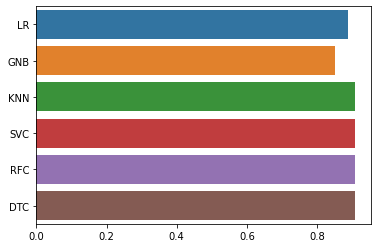

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

xs=["LR", "GNB", "KNN", "SVC", "RFC", "DTC"]
ys=accuracy
p=zip(xs,ys)
print({xs[i]:ys[i] for i in range(6)})

sns.barplot(x=ys,y=xs)
plt.show()

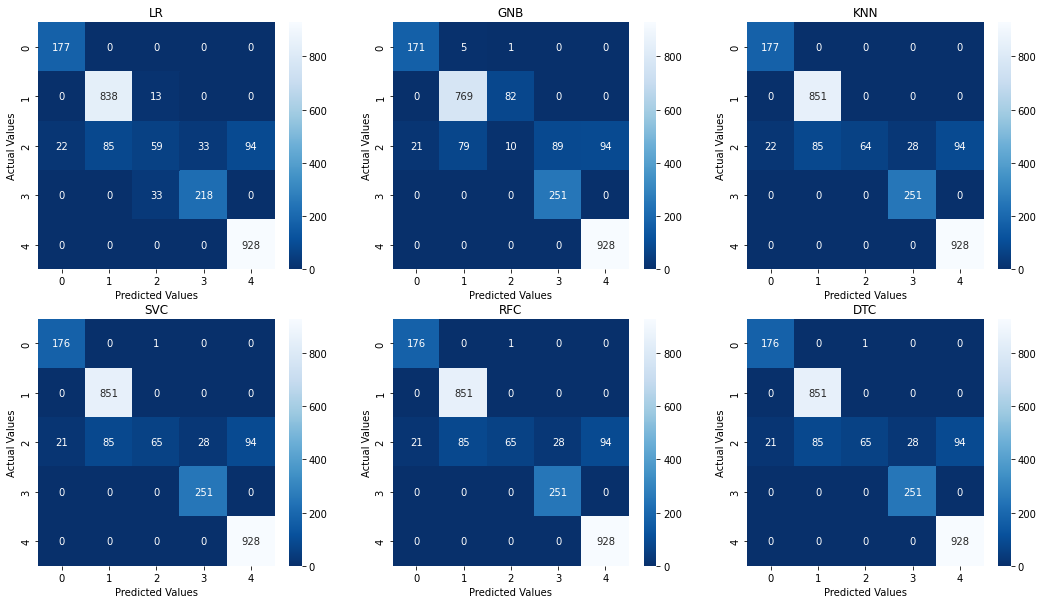

In [32]:
fig=plt.figure(figsize=(18,10))
for i in range(6):
  cm=confusionmatrix[i]
  label=xs[i]
  sub=fig.add_subplot(2,3,i+1).set_title(label)
  cm_plot=sns.heatmap(cm,annot=True, fmt="d",cmap="Blues_r")
  cm_plot.set_xlabel("Predicted Values")
  cm_plot.set_ylabel("Actual Values")

In [33]:
import pickle
with open('model1.pkl', 'wb') as handle:
    pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)

In [34]:
ingredients="Pure amla juice, sodium benzoate"

A_C=any([key in ingredients for key in ["color","colour","yellow","blue","green","red"]])
nn=any([key in ingredients for key in ["nitrite","nitrate"]])
sw=any([key in ingredients for key in ['aspartame',
    'sucralose',
    'acesulfame K','acesulfame'
    'saccharin',
    'xylitol','sweetener','neotame']])
tf=any([key in ingredients for key in ["hydrogenated","hydrogenated oil","hydrogenated soy","trans fat"]])
hf=any([key in ingredients for key in ['high fructose corn syrup','corn syrup','hf']])
ff=any([key in ingredients for key in ['fragrance','flavor','flavour','scent']])

map={k:v for k,v in zip(["Artificial_colour","Nitrites_Nitrates","HighFructoseCornSyrup","Trans_Fat","Fragrance_Flavor","Artificial_Sweetener"],[A_C,nn,hf,tf,ff,sw])}

X=pd.DataFrame(map,index=range(5))

res=model.predict(X)

print(res[0])

5
